<a href="https://colab.research.google.com/github/monjar/AI-Assignments/blob/master/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras import regularizers


In [2]:
np.random.seed(0)

In [3]:
number_of_features = 10000
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")


In [11]:

def build_model(n_features):
  network = models.Sequential()
  network.add(layers.Dense(
    units = 16,
    activation = "relu",
    input_shape=(n_features,),
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
  ))
  network.add(layers.Dropout(0.5))
  network.add(layers.Dense(
    units = 16,
    activation = "relu",
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
  ))

  network.add(layers.Dropout(0.5))
  network.add(layers.Dense(
    units = 1,
    activation = "sigmoid"
  ))

  network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
  return network

nueral_net = build_model(number_of_features)



In [12]:
fit_nueral_net = nueral_net.fit(features_train,
                                target_train,
                                epochs=25,
                                verbose = 0,
                                batch_size=1000,
                                validation_data=(features_test, target_test))
train_loss = fit_nueral_net.history["loss"]
test_loss = fit_nueral_net.history["val_loss"]

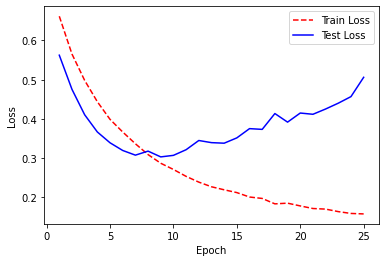

In [13]:
epoch_range = range(1, len(train_loss) + 1)

plt.plot(epoch_range, train_loss, "r--")
plt.plot(epoch_range, test_loss, "b-")
plt.legend(["Train Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

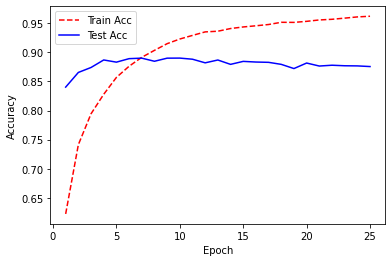

In [14]:
train_accuracy = fit_nueral_net.history["accuracy"]
test_accuracy = fit_nueral_net.history["val_accuracy"]

plt.plot(epoch_range, train_accuracy, "r--")
plt.plot(epoch_range, test_accuracy, "b-")
plt.legend(["Train Acc", "Test Acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()